## Cherilyn Conner
### Python assignment 3

### 07/23/19

In [1]:
%pwd

'C:\\Users\\Cherilyn\\Google Drive\\School\\summer\\Financial Models'

## Packages

In [321]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use ('ggplot')
from sklearn import linear_model

In [322]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

## Reading in and cleaning the data
#### note some cleaning was done in excel to remove extra information outside of the chart, to fill in the rest of the historical risk premium, and to fill in the inflation rate (inflation rate was calculated by Mike in python)

In [323]:
xls=pd.ExcelFile('histretSP.cleaned.xls')
RBY = pd.read_excel(xls, 'Returns by year', header=0, index_col=False, keep_default_na=True)
Tbill = pd.read_excel(xls, 'T. Bill rates')
SP500raw = pd.read_excel(xls, 'S&P 500 & Raw Data')
Tbond = pd.read_excel(xls, 'T. Bond return')

RBY.columns = RBY.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '').str.replace('&', '').str.replace('.', '').str.replace('_', '').str.replace('-', '').str.replace('3', 'three').str.replace('10', 'ten')

for col in RBY.columns: 
    print(col) 

year
sp500includesdividends
threemonthtbill
returnontenyeartbond
stocks
tbills
tbonds
stocksbills
stocksbonds
historicalriskpremium
inflationrate
sp500includesdividends2
threemonthtbillreal
tenyeartbonds


## looking at the basic stats of the data to get a feel for it

In [324]:
RBY.describe(include="all")

,year,sp500includesdividends,threemonthtbill,returnontenyeartbond,stocks,tbills,tbonds,stocksbills,stocksbonds,historicalriskpremium,inflationrate,sp500includesdividends2,threemonthtbillreal,tenyeartbonds
count,91.00000,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000
mean,1973.00000,0.113563,0.034256,0.050970,52883.836118,700.789959,1655.366008,0.079307,0.062592,0.038257,7.133799,-0.753778,-0.771016,-0.765534
std,26.41338,0.195815,0.030400,0.076994,91627.632749,708.196449,2234.532904,0.198958,0.211943,0.060232,5.963328,0.177450,0.159559,0.167487
min,1928.00000,-0.438375,0.000250,-0.111167,50.664911,103.080000,100.835471,-0.461475,-0.566536,-0.158062,1.000000,-0.967103,-0.951485,-0.951054
25%,1950.50000,-0.011984,0.009612,0.008776,397.696755,125.262572,198.978290,-0.032951,-0.092259,0.037241,1.677675,-0.905529,-0.910728,-0.910001
50%,1973.00000,0.135244,0.030450,0.032746,4080.444016,272.162424,372.571132,0.095153,0.078464,0.049719,5.998780,-0.846080,-0.847509,-0.849553
75%,1995.50000,0.244462,0.050900,0.083433,68850.939047,1276.415707,2495.247674,0.213581,0.200324,0.055214,10.354385,-0.611334,-0.606845,-0.600553
max,2018.00000,0.525633,0.143000,0.328145,399768.635072,2063.403796,7309.873866,0.516008,0.492735,0.429757,19.809920,-0.373640,-0.488150,-0.456720


## looking at the changes in each variable each year from 1928 until 2018

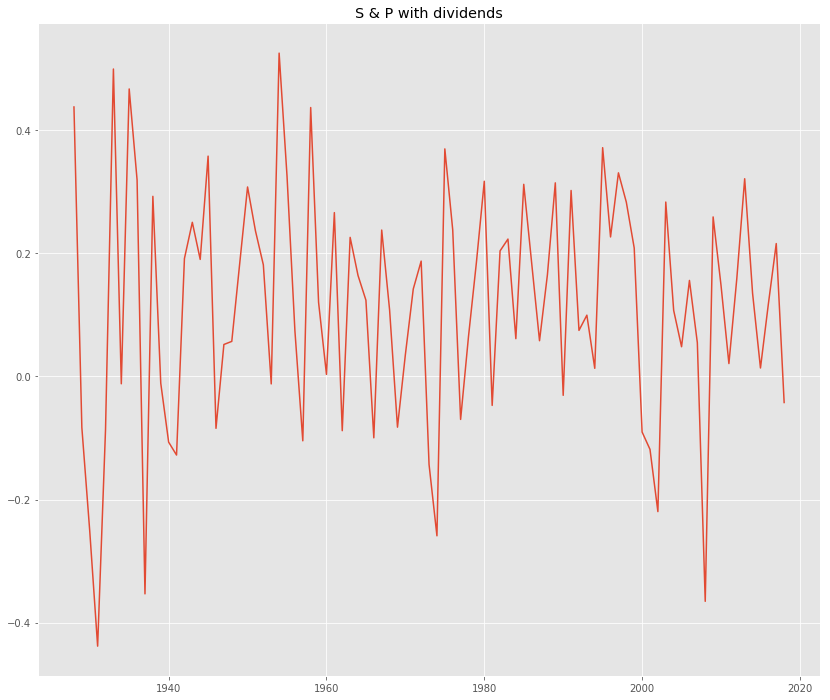

In [325]:
axes = plt.subplots(figsize = (14,12))
SP= RBY['sp500includesdividends']
plt.plot(RBY.year,SP)
plt.title("S & P with dividends");
#The percent change in the S&P dividends varries from year to year with no consistent pattern

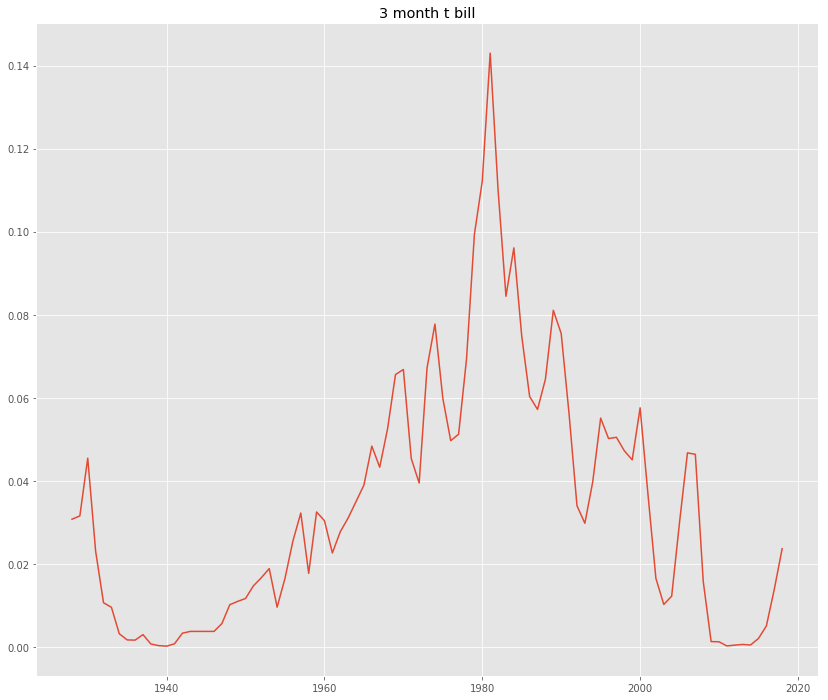

In [326]:
axes = plt.subplots(figsize = (14,12))
m3tbill= RBY['threemonthtbill']
plt.plot(RBY.year,m3tbill)
plt.title("3 month t bill");
# the percent of change in the 3 month treasury bills mostly stay below 10% however there is a jump around 1980

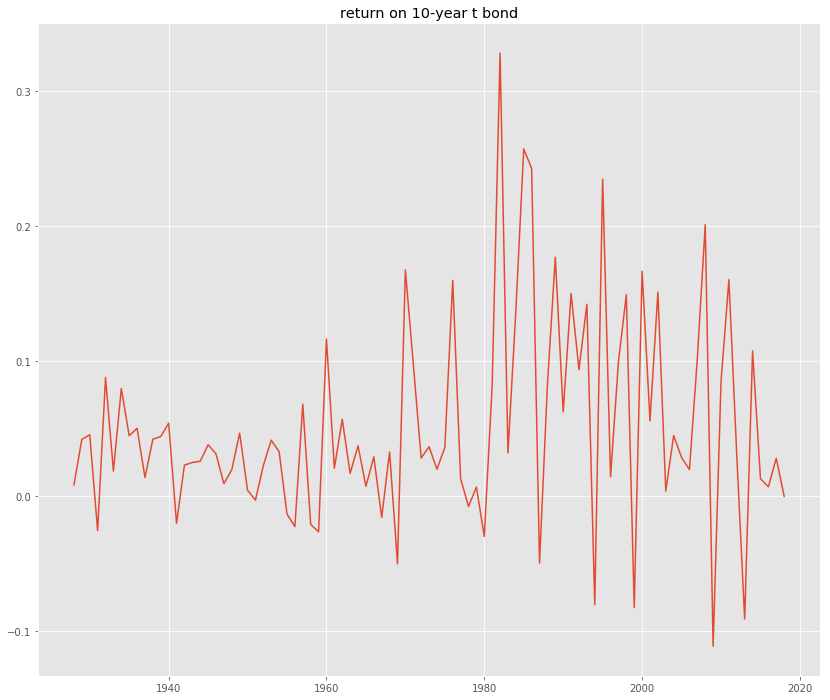

In [327]:
axes = plt.subplots(figsize = (14,12))
y10= RBY['returnontenyeartbond']
plt.plot(RBY.year,y10)
plt.title("return on 10-year t bond");
#The percent change in the return on 10-year treasury bond varries from year and apprears to have higher inflection in the later years; however this is not adjusted for inflation

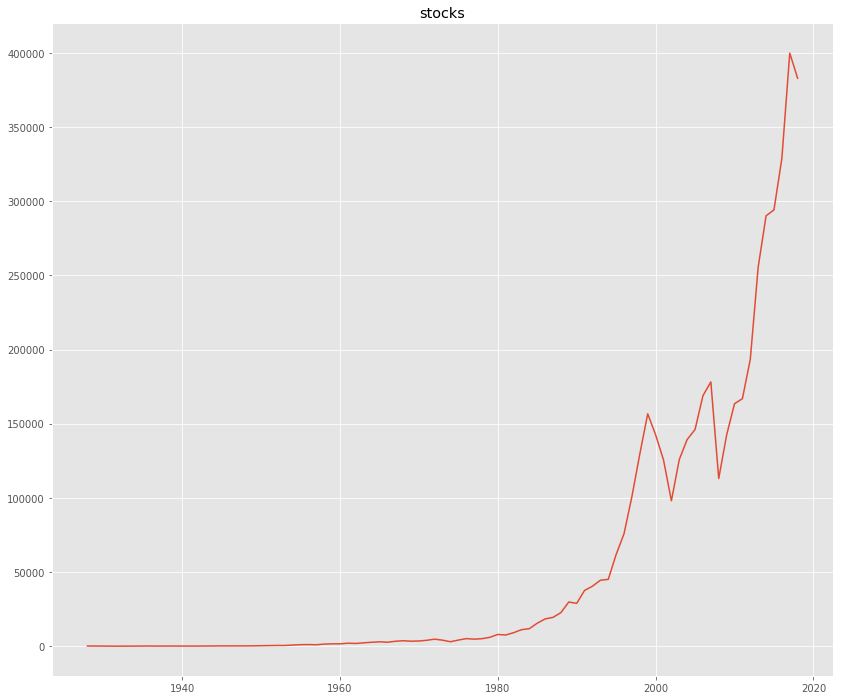

In [328]:
axes = plt.subplots(figsize = (14,12))
Stock= RBY['stocks']
plt.plot(RBY.year,Stock)
plt.title("stocks");
# the price of the stock aprear to follow an exponential function; however the price is not adjusted for inflation

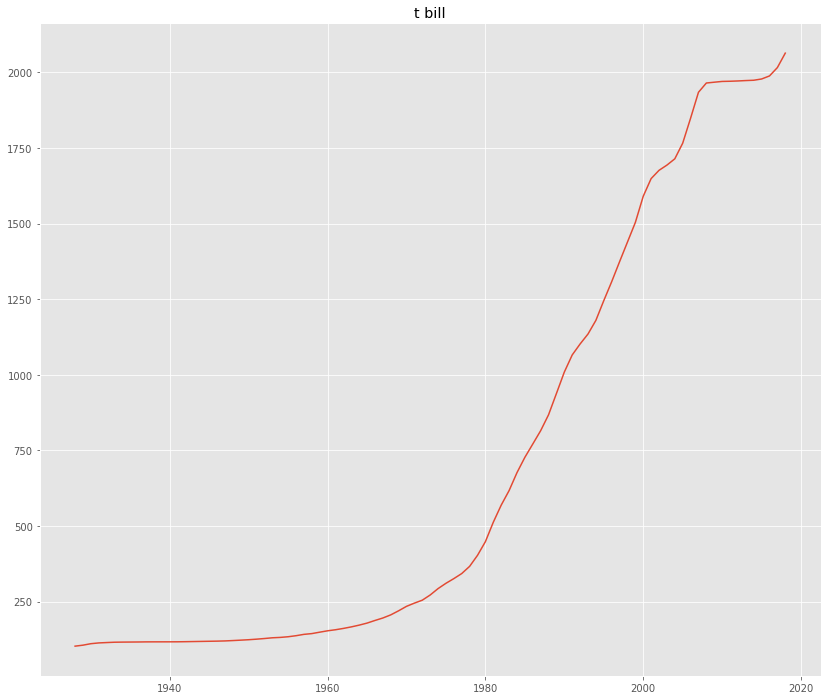

In [329]:
axes = plt.subplots(figsize = (14,12))
tbill= RBY['tbills']
plt.plot(RBY.year,tbill)
plt.title("t bill");
# The price of treasury bills also aprears to follow an exponential function; however the price is not adjusted for inflation

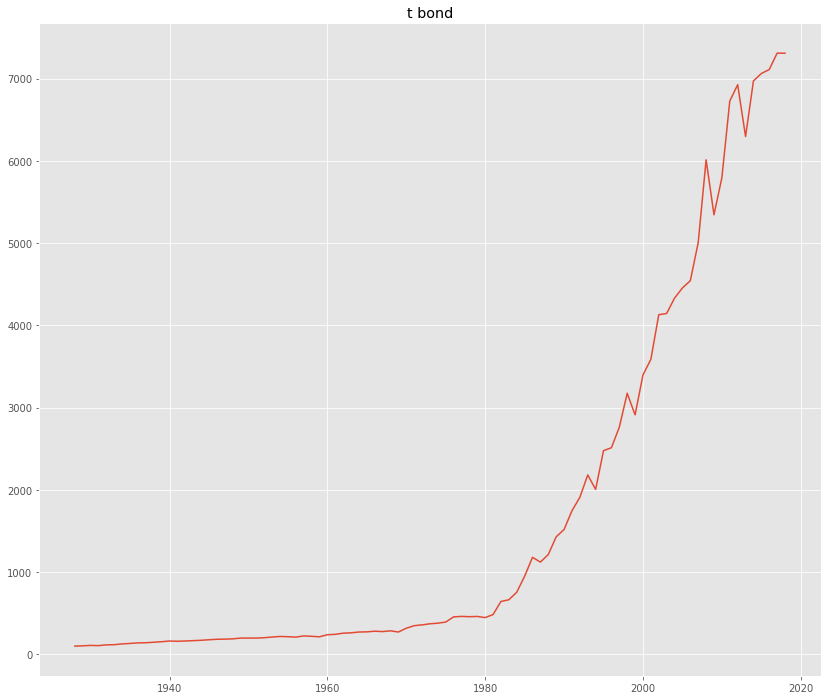

In [330]:
axes = plt.subplots(figsize = (14,12))
tbond= RBY['tbonds']
plt.plot(RBY.year,tbond)
plt.title("t bond");
# The price of treasury bonds also aprears to follow an exponential function; however the price is not adjusted for inflation

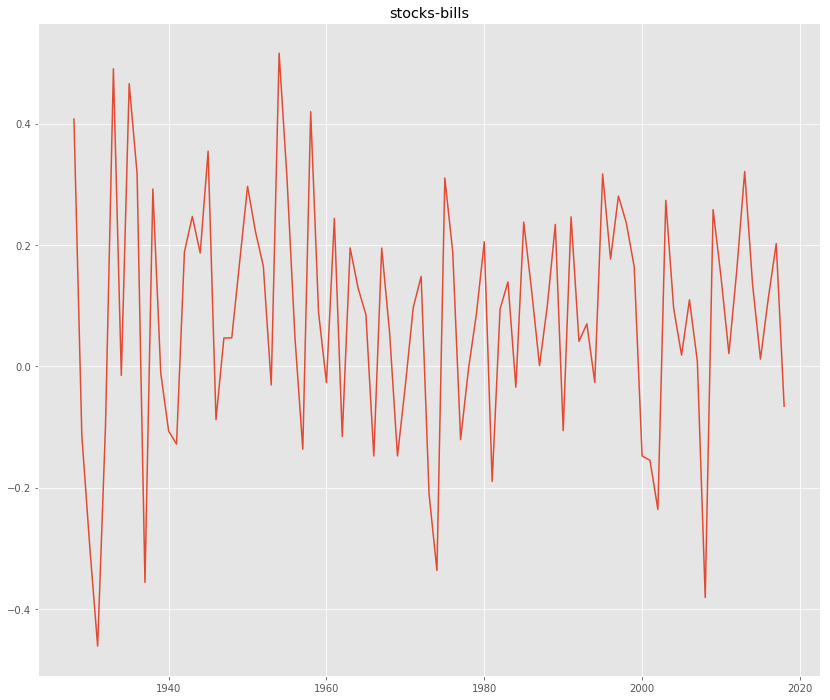

In [331]:
axes = plt.subplots(figsize = (14,12))
sbill= RBY['stocksbills']
plt.plot(RBY.year,sbill)
plt.title("stocks-bills");
#The percent change in the stocks minus the treasury bills varries from year to year with no consistent pattern

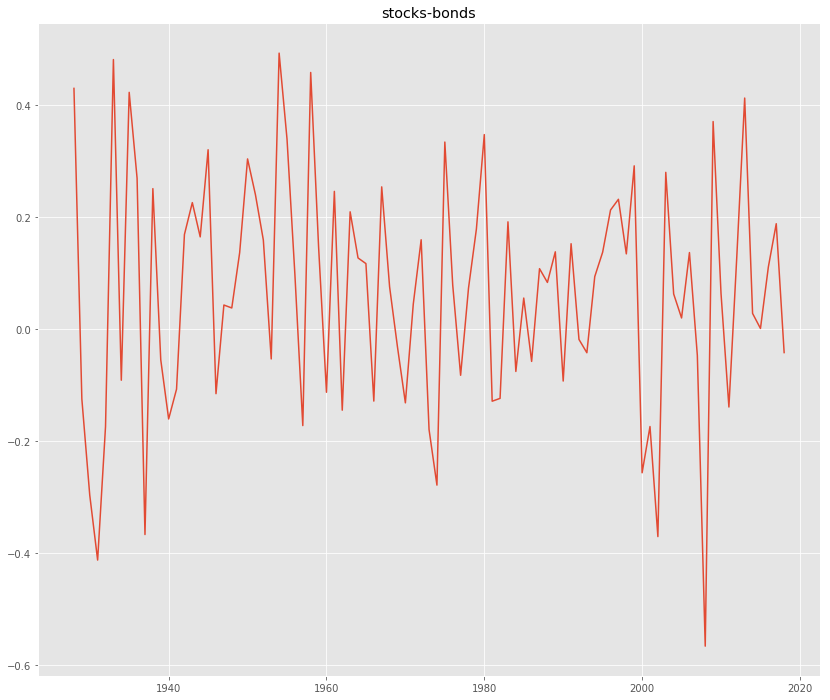

In [332]:
axes = plt.subplots(figsize = (14,12))
sbond= RBY['stocksbonds']
plt.plot(RBY.year,sbond)
plt.title("stocks-bonds");
#The percent change in the stocks minus the treasury bonds varries from year to year with no consistent pattern

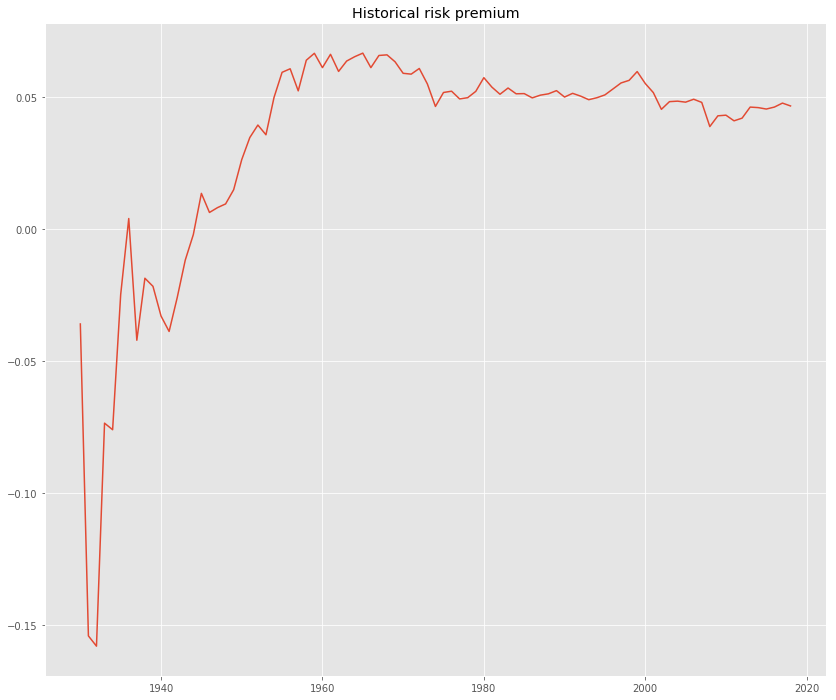

In [333]:
axes = plt.subplots(figsize = (14,12))
hrp= RBY['historicalriskpremium']
hrp2=hrp[2:] #removed 1928 from the historical risk premium; the formula calculates the percent change since 1928 so 1928 does not calculate correctly
year=RBY.year[2:]
plt.plot(year,hrp2)
plt.title("Historical risk premium");
# the historical risk premium decrease to begin with; then apprears to have jumped from 1930 to 1960 and it has since leveled out to around 5%

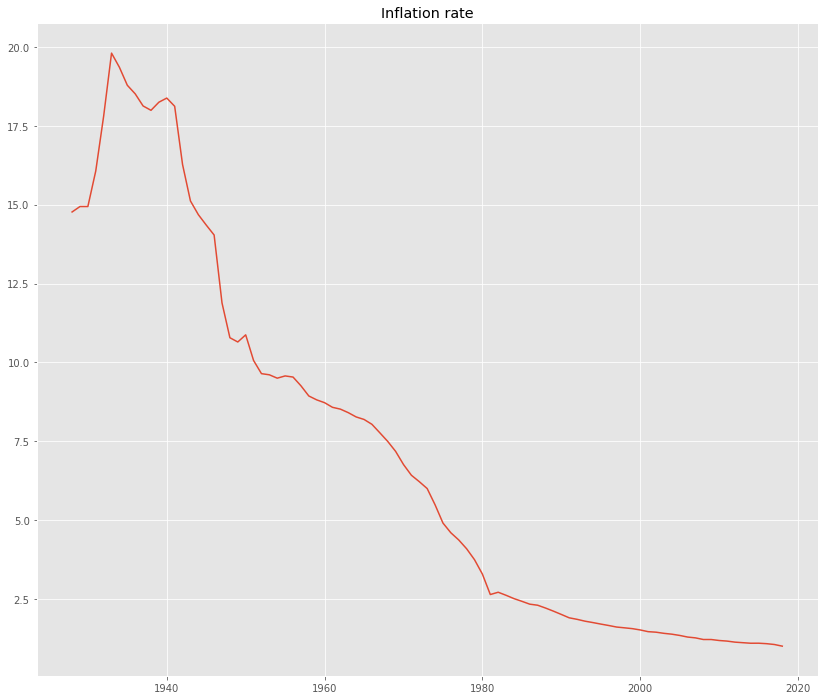

In [334]:
axes = plt.subplots(figsize = (14,12))
inflate= RBY['inflationrate']
plt.plot(RBY.year,inflate)
plt.title("Inflation rate");
#the inflation rate had a slight increase after 1928 and then after 1940 it has steadily decreased

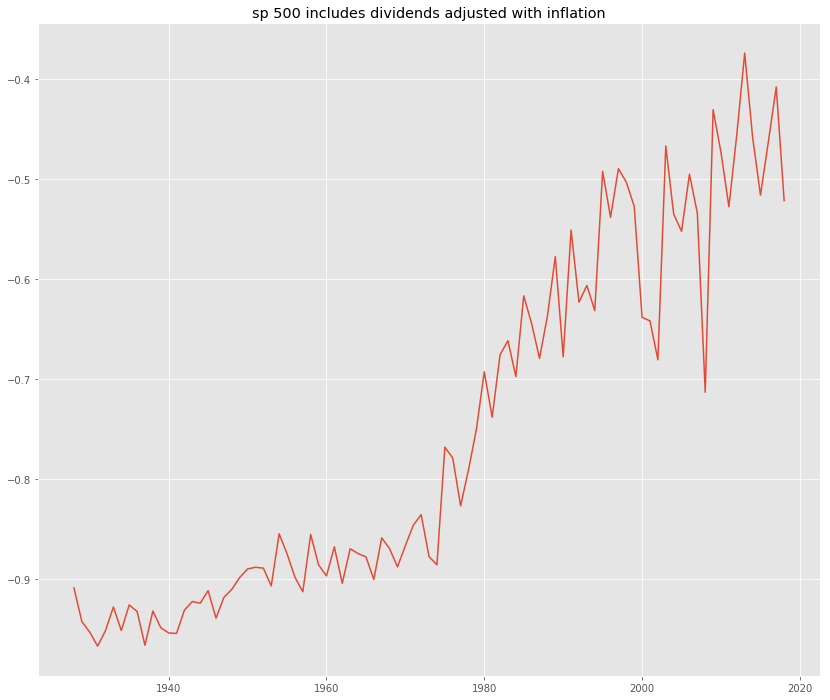

In [335]:
axes = plt.subplots(figsize = (14,12))
spreal= RBY['sp500includesdividends2']
plt.plot(RBY.year,spreal)
plt.title("sp 500 includes dividends adjusted with inflation");
#when adjusted for inflation the percent change of the S&P 500 still shows variation, however it also shows a an increase as time goes on

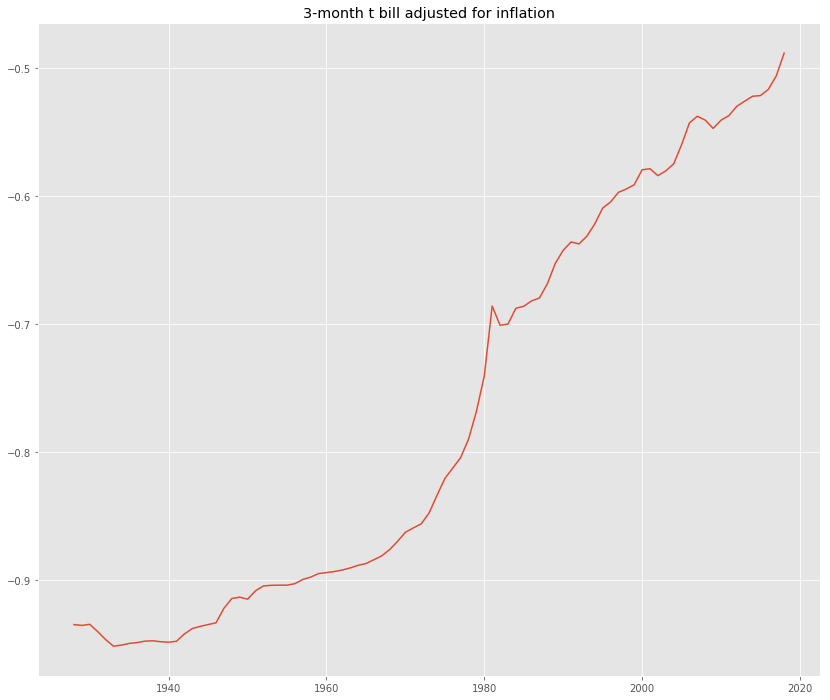

In [336]:
axes = plt.subplots(figsize = (14,12))
m3real= RBY['threemonthtbillreal']
plt.plot(RBY.year,m3real)
plt.title("3-month t bill adjusted for inflation");
#when adjusted for inflation the 3 month treasury bills are mostly consistently rising

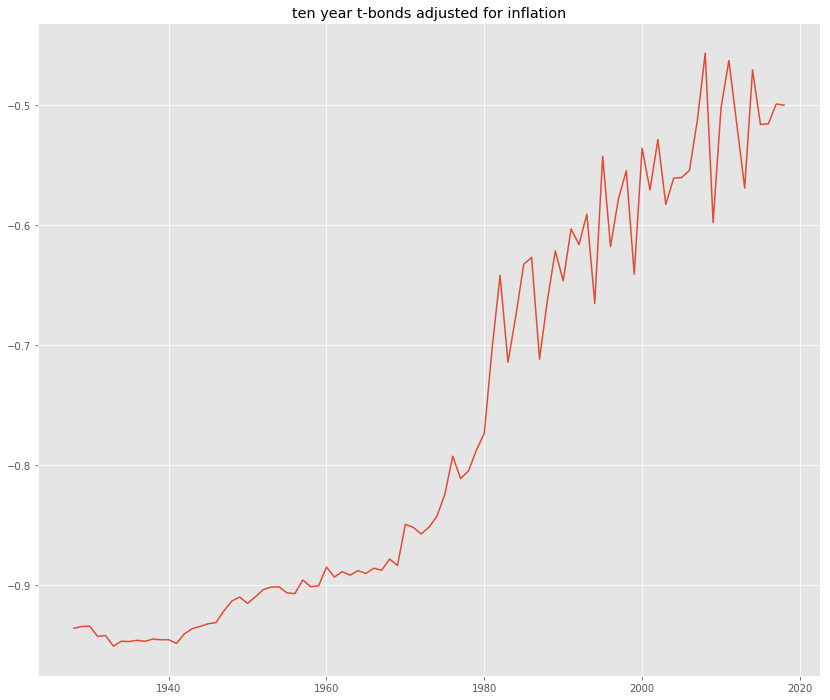

In [337]:
#10 year real.
axes = plt.subplots(figsize = (14,12))
y10real= RBY['tenyeartbonds']
plt.plot(RBY.year,y10real)
plt.title("ten year t-bonds adjusted for inflation");
#when adjusted for inflation the percent change of the ten year treasury bonds still show variation, however it also shows an increase as time goes on

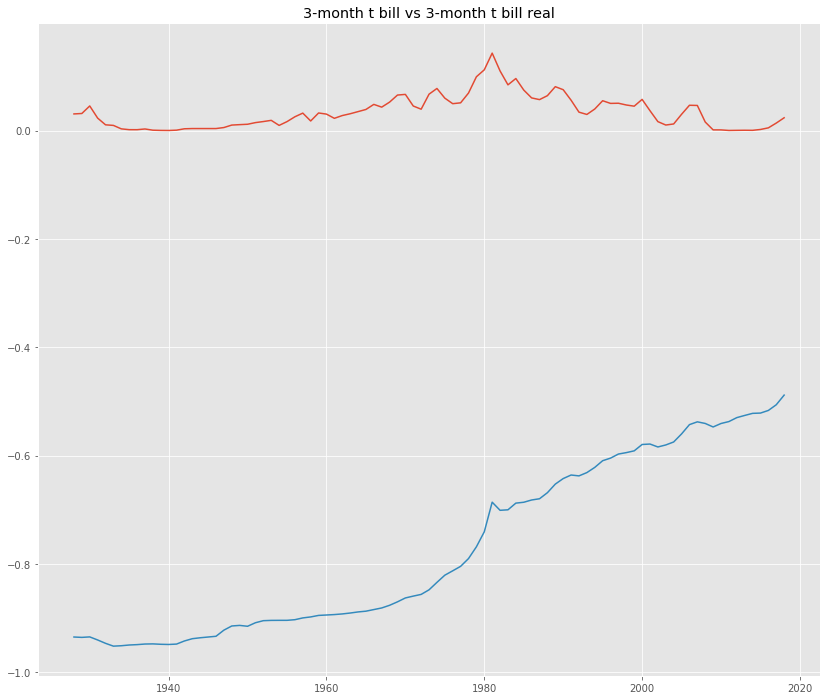

In [338]:
axes = plt.subplots(figsize = (14,12))
m3comp= RBY.filter(regex='threemonthtbill')
plt.plot(RBY.year,m3comp)
plt.title("3-month t bill vs 3-month t bill real");
#a nice view comparing the 3 month treasury bills with and without inflation

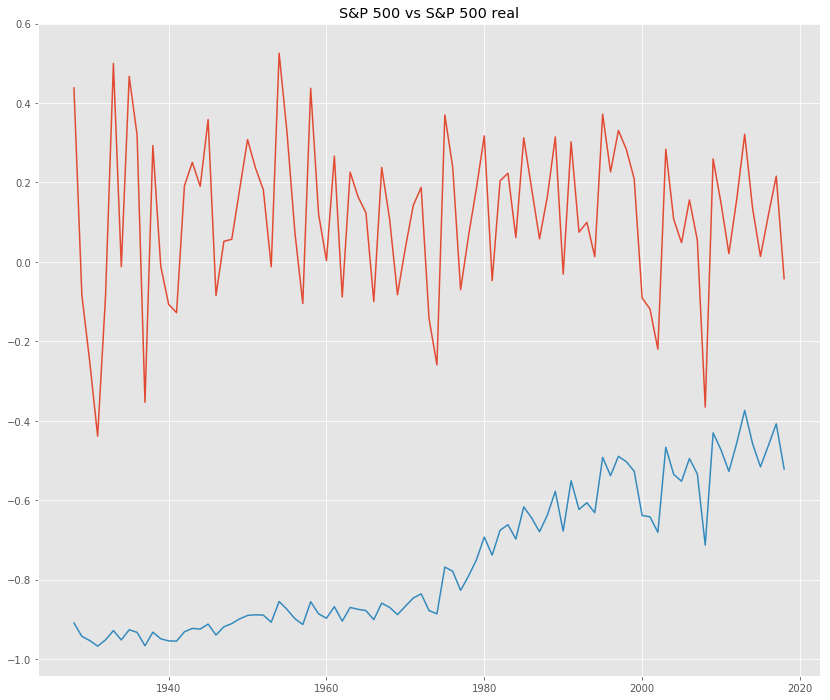

In [339]:
axes = plt.subplots(figsize = (14,12))
SPcomp= RBY.filter(regex='sp500includesdividends')
plt.plot(RBY.year,SPcomp)
plt.title("S&P 500 vs S&P 500 real");
#a nice view comparing theS&P 500 percent change with and without inflation

## Overview of all of the scatterplots to look for correlations
#### I mostly looked for linear correlations; Michael is looking into the non-linear corelations

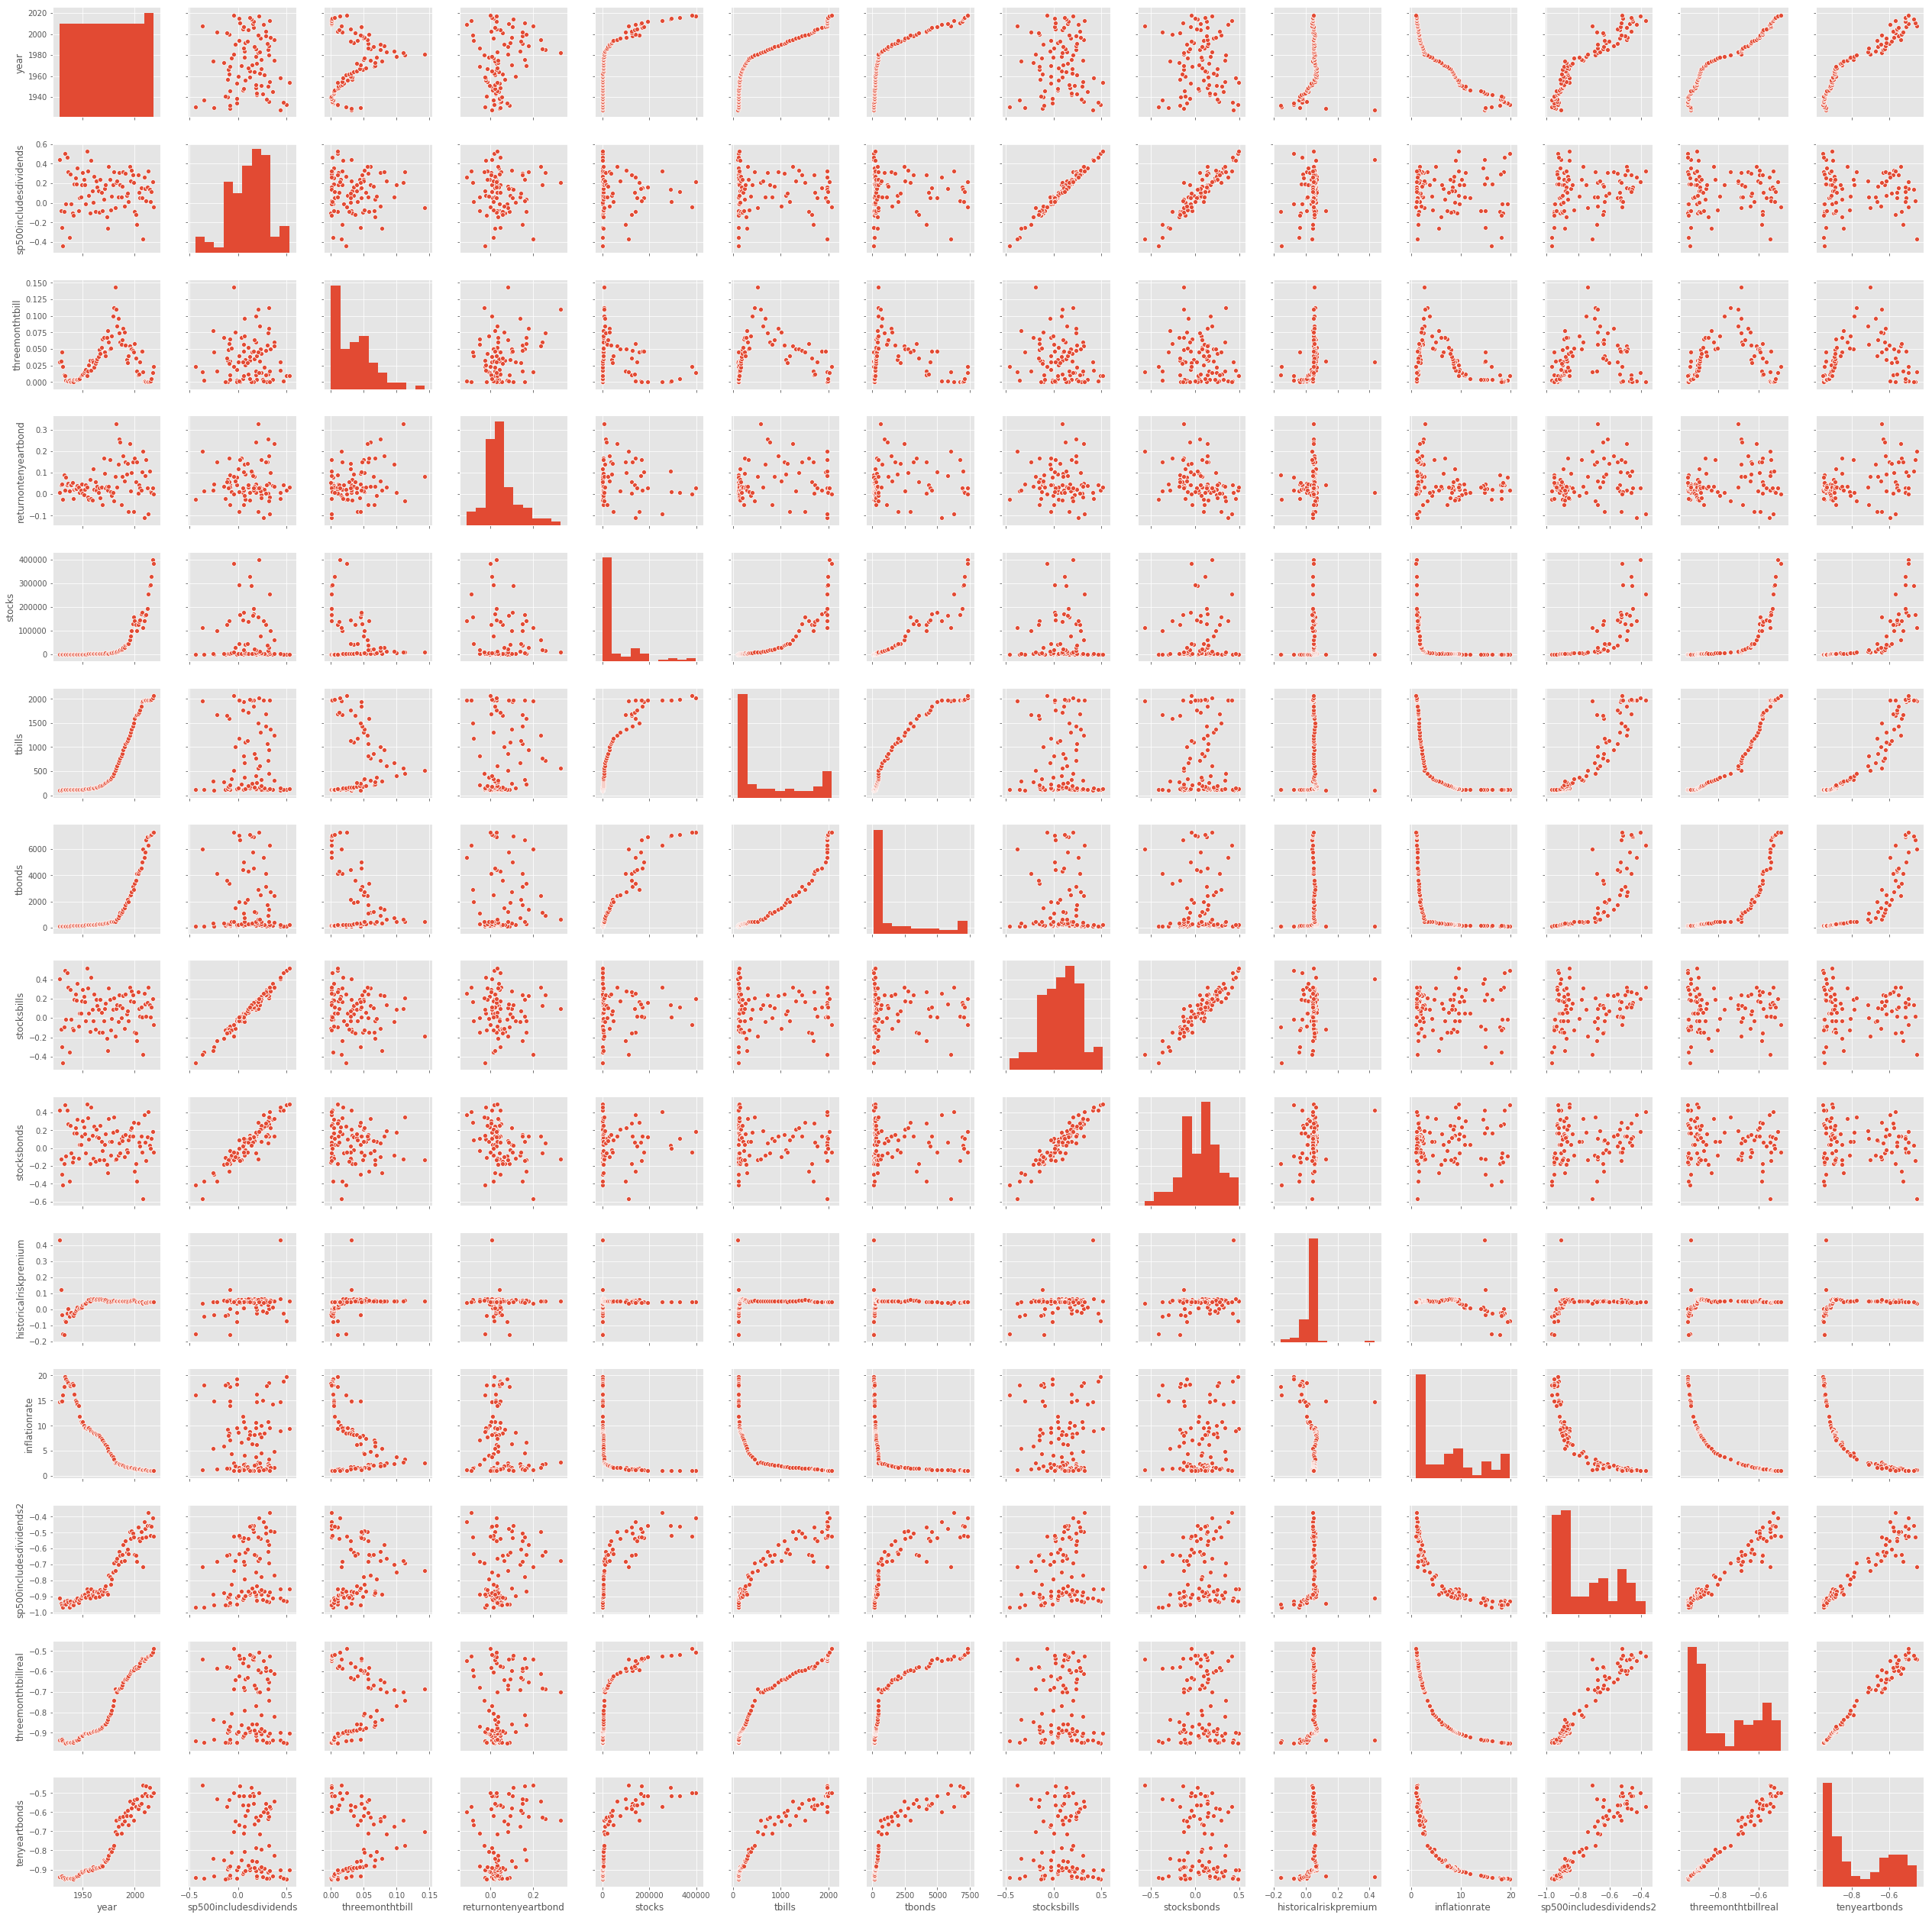

In [262]:
sns.pairplot(RBY);

## Graphing suspected relationships and fitting a regression to each one

0.9766703652799604

array([[1.00412945]])

array([-0.03472516])

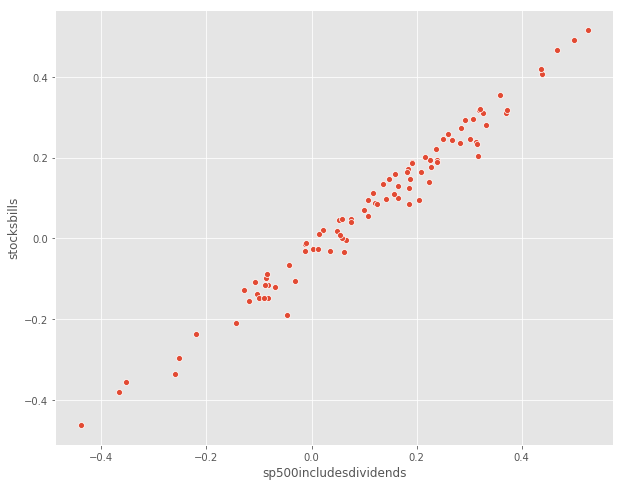

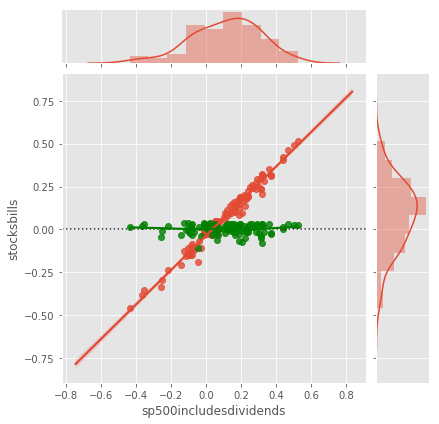

In [340]:
# S&P 500 vs stock-tbill
#strong positive linear relationship
#as the %change in S&P 500 increases the % change of the stock minus the tbill increases #makes sense

axes = plt.subplots(figsize = (10,8));
sns.scatterplot(x=SP, y=sbill);
sns.jointplot(x=SP, y=sbill, kind="reg");
sns.residplot(x=SP, y=sbill, lowess=True, color="g");

X = pd.DataFrame(SP)
y = pd.DataFrame(sbill)

lm = linear_model.LinearRegression()
model = lm.fit(X,y)

predictions = lm.predict(X)
#print(predictions)
lm.score(X,y) # really good r-square
lm.coef_ #slope is about equal to 1
lm.intercept_ # y intercept close to zero; line close to y=x

0.8680912477785875

array([[1.00845101]])

array([-0.05193003])

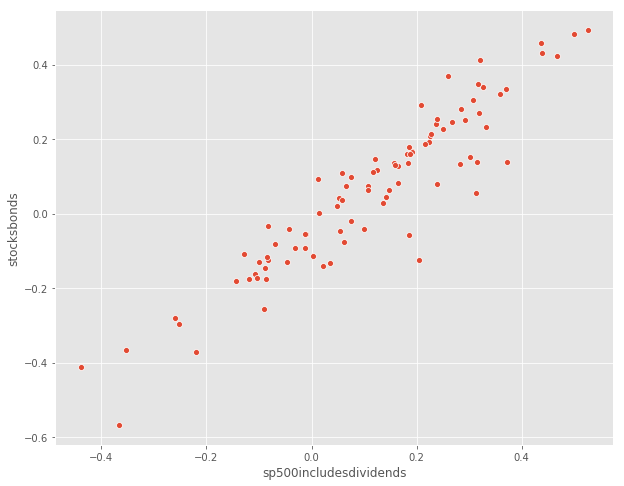

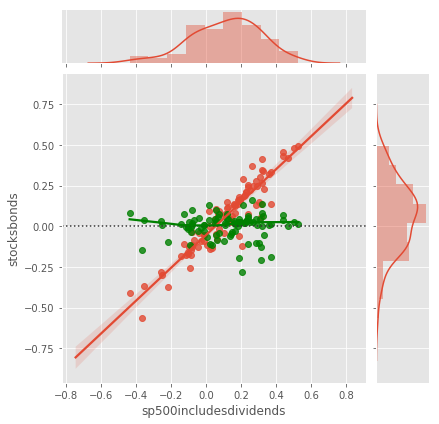

In [341]:
# S&P 500 vs stock-tbond
#strong positive linear relationship
#as the % change in S&P 500 increases the % change of the stock minus the tbond increases #makes sense

axes = plt.subplots(figsize = (10,8))
sns.scatterplot(x=SP, y=sbond);
sns.jointplot(x=SP, y=sbond, kind="reg");
sns.residplot(x=SP, y=sbond, lowess=True, color="g")

X = pd.DataFrame(SP)
y = pd.DataFrame(sbond)

lm = linear_model.LinearRegression()
model = lm.fit(X,y)

predictions = lm.predict(X)
#print(predictions)
lm.score(X,y) # very good r squared
lm.coef_ #slope is about equal to 1
lm.intercept_ # y intercept close to zero; 

0.9162283318639312

array([[0.30336736]])

array([198.60594608])

0.9855133912260327

array([[28.59731584]])

array([-229.22298895])

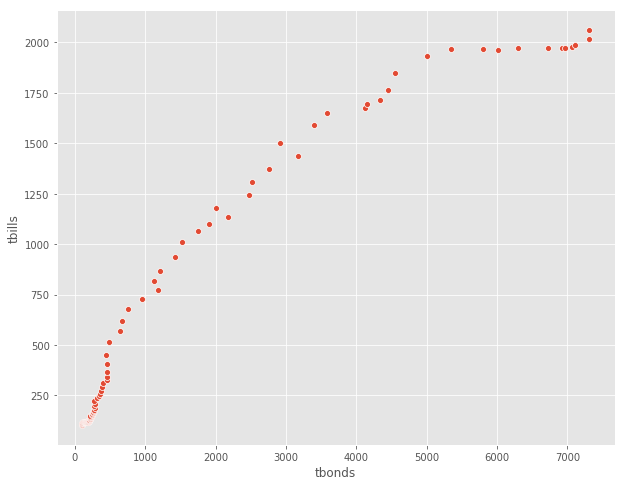

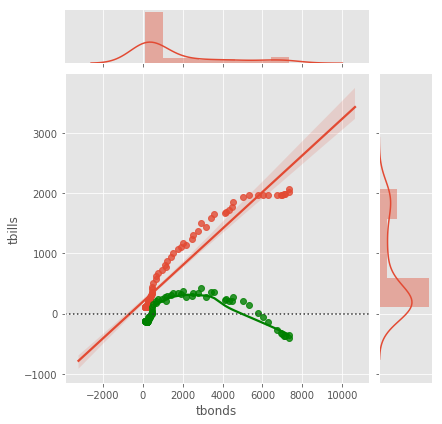

In [342]:
# treasury bond vs treasury bill
#strong positive linear-square root relationship
#as the price of tbonds increases the price of tbills increases rapidly and then levels off

axes = plt.subplots(figsize = (10,8))
sns.scatterplot(x=tbond, y=tbill);
sns.jointplot(x=tbond, y=tbill, kind="reg");
sns.residplot(x=tbond, y=tbill, lowess=True, color="g")

X = pd.DataFrame(tbond)
y = pd.DataFrame(tbill)

lm = linear_model.LinearRegression()
model = lm.fit(X,y)

predictions = lm.predict(X)
#print(predictions)
lm.score(X,y) # really good r-square   # but does apprear to be leaning more towards a square root function
lm.coef_ #small slope of .3
lm.intercept_


X = np.sqrt(pd.DataFrame(tbond))
y = pd.DataFrame(tbill)

lm = linear_model.LinearRegression()
model = lm.fit(X,y)

predictions = lm.predict(X)
#print(predictions)
lm.score(X,y) # better r squared when taking square root of tbond
lm.coef_
lm.intercept_

0.9353606303931006

array([[0.8696329]])

array([-0.11550588])

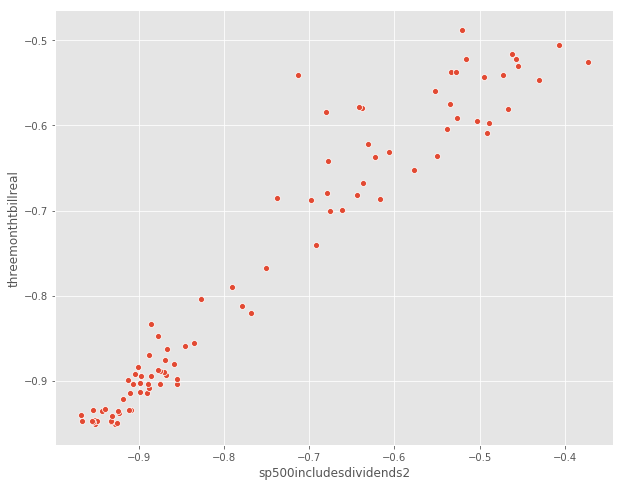

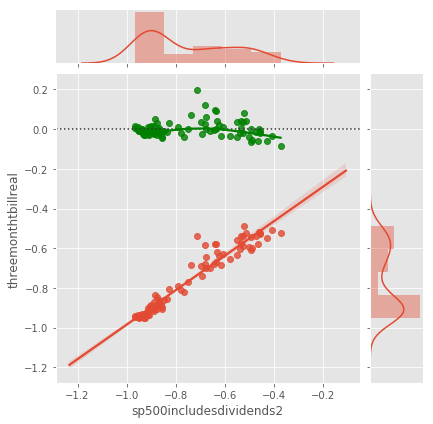

In [343]:
# S&P 500 adjusted for inflation vs adjusted 3 month treasury bill
#decently strong positive linear relationship
#as the %change in adjusted s&p 500 increases the % change of the adjusted three month treasury bill increases

axes = plt.subplots(figsize = (10,8))
sns.scatterplot(x=spreal, y=m3real);
sns.jointplot(x=spreal, y=m3real, kind="reg");
sns.residplot(x=spreal, y=m3real, lowess=True, color="g")


X = pd.DataFrame(spreal)
y = pd.DataFrame(m3real)

lm = linear_model.LinearRegression()
model = lm.fit(X,y)

predictions = lm.predict(X)
#print(predictions)
lm.score(X,y) # really good r-square
lm.coef_ #slope a little less than one
lm.intercept_ 

0.9031394397124606

array([[0.89698102]])

array([-0.08940933])

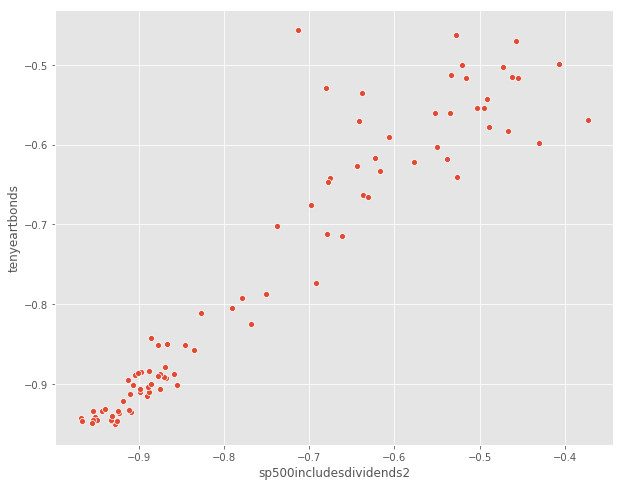

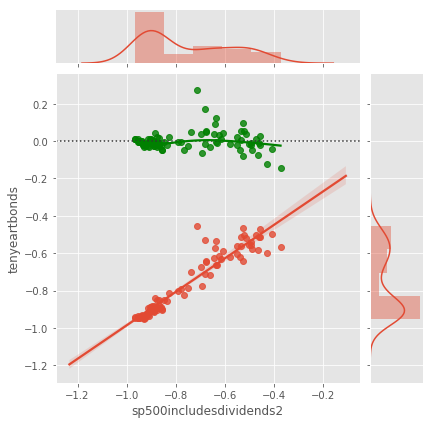

In [344]:
# S&P 500 adjusted for inflation vs adjusted 10 year treasury bond
#decently strong positive linear relationship
#as the %change in adjusted s&p 500 increases the % change of the adjusted three month treasury bond increases

axes = plt.subplots(figsize = (10,8))
sns.scatterplot(x=spreal, y=y10real)
sns.jointplot(x=spreal, y=y10real, kind="reg")
sns.residplot(x=spreal, y=y10real, lowess=True, color="g");

X = pd.DataFrame(spreal)
y = pd.DataFrame(y10real)

lm = linear_model.LinearRegression()
model = lm.fit(X,y)

predictions = lm.predict(X)
#print(predictions)
lm.score(X,y) # really good r-square
lm.coef_ #slope a little less than one
lm.intercept_ 

0.9801283378464355

array([[1.03920423]])

array([0.03570922])

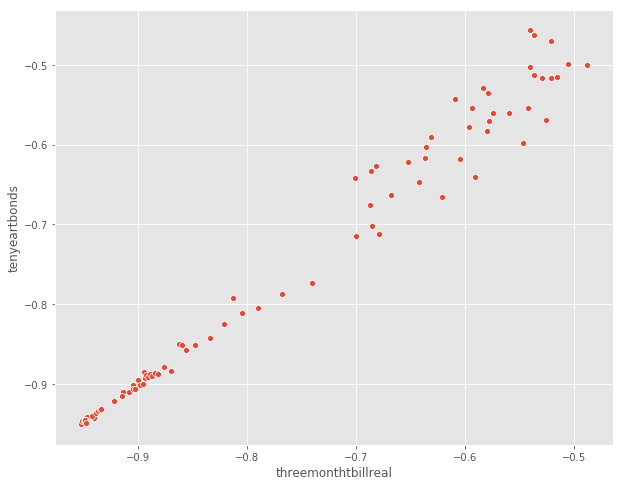

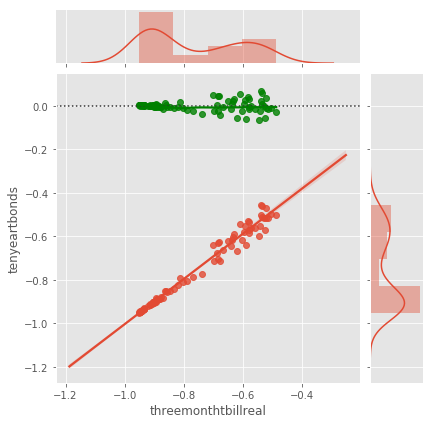

In [345]:
# 3 month treasury bill adjusted for inflation vs adjusted 10 year treasury bond
#very strong positive linear relationship
#as the %change in adjusted 3 month treasury bills increases the %change of the adjusted three month treasury bond increases

axes = plt.subplots(figsize = (10,8))
sns.scatterplot(x=m3real, y=y10real)
sns.jointplot(x=m3real, y=y10real, kind="reg")
sns.residplot(x=m3real, y=y10real, lowess=True, color="g");

X = pd.DataFrame(m3real)
y = pd.DataFrame(y10real)

lm = linear_model.LinearRegression()
model = lm.fit(X,y)

predictions = lm.predict(X)
#print(predictions)
lm.score(X,y) # really good r-square
lm.coef_ #slope a little bigger than one
lm.intercept_ 